# **# Exercise 1: Setting Up the Environment**

In [ ]:
#Install the Required Library
!pip install pgmpy

#Import Libraries
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy.factors.discrete import TabularCPD

# **# Exercise 2: Building a Simple Bayesian Network**

In [ ]:
#Define the Structure
model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])

#Define Conditional Probability Tables (CPTs)
cpd_weather = TabularCPD(variable='Weather', variable_card=2, values=[[0.8], [0.2]])
cpd_traffic = TabularCPD(variable='Traffic', variable_card=2,
                          values=[[0.9, 0.5], [0.1, 0.5]],
                          evidence=['Weather'], evidence_card=[2])
cpd_late = TabularCPD(variable='Late', variable_card=2,
                      values=[[0.95, 0.4], [0.05, 0.6]],
                      evidence=['Traffic'], evidence_card=[2])

# Add CPDs to the model
model.add_cpds(cpd_weather, cpd_traffic, cpd_late)

# Check if the model is valid
assert model.check_model()

# **# Exercise 3: Querying the Bayesian Network**

In [ ]:
#Perform Exact Inference:
inference = VariableElimination(model)

result = inference.query(variables=['Late'], evidence={'Weather': 1})
print(result)

+---------+-------------+
| Late    |   phi(Late) |
+=========+=============+
| Late(0) |      0.6750 |
+---------+-------------+
| Late(1) |      0.3250 |
+---------+-------------+


# **# Exercise 4: Parameter Learning**

In [ ]:
#Simulate a Dataset
data = pd.DataFrame({
    'Weather': np.random.choice([0, 1], size=1000, p=[0.8, 0.2]),
    'Traffic': np.nan,
    'Late': np.nan,
})

data.loc[data['Weather'] == 0, 'Traffic'] = np.random.choice(
    [0, 1],
    size=data[data['Weather'] == 0].shape[0],
    p=[0.9, 0.1]
)

data.loc[data['Weather'] == 1, 'Traffic'] = np.random.choice(
    [0, 1],
    size=data[data['Weather'] == 1].shape[0],
    p=[0.5, 0.5]
)

data['Late'] = np.where(
    data['Traffic'] == 0,
    np.random.choice([0, 1], size=data.shape[0], p=[0.95, 0.05]),
    np.random.choice([0, 1], size=data.shape[0], p=[0.4, 0.6])
)

# Estimate the Parameters
from pgmpy.estimators import MaximumLikelihoodEstimator

model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])

model.fit(data, estimator=MaximumLikelihoodEstimator)

for cpd in model.get_cpds():
    print(cpd)

+------------+-------+
| Weather(0) | 0.807 |
+------------+-------+
| Weather(1) | 0.193 |
+------------+-------+
+--------------+---------------------+---------------------+
| Weather      | Weather(0)          | Weather(1)          |
+--------------+---------------------+---------------------+
| Traffic(0.0) | 0.9033457249070632  | 0.49740932642487046 |
+--------------+---------------------+---------------------+
| Traffic(1.0) | 0.09665427509293681 | 0.5025906735751295  |
+--------------+---------------------+---------------------+
+---------+----------------------+--------------+
| Traffic | Traffic(0.0)         | Traffic(1.0) |
+---------+----------------------+--------------+
| Late(0) | 0.9515151515151515   | 0.44         |
+---------+----------------------+--------------+
| Late(1) | 0.048484848484848485 | 0.56         |
+---------+----------------------+--------------+


# **Exercise 5: Visualizing the Bayesian Network**

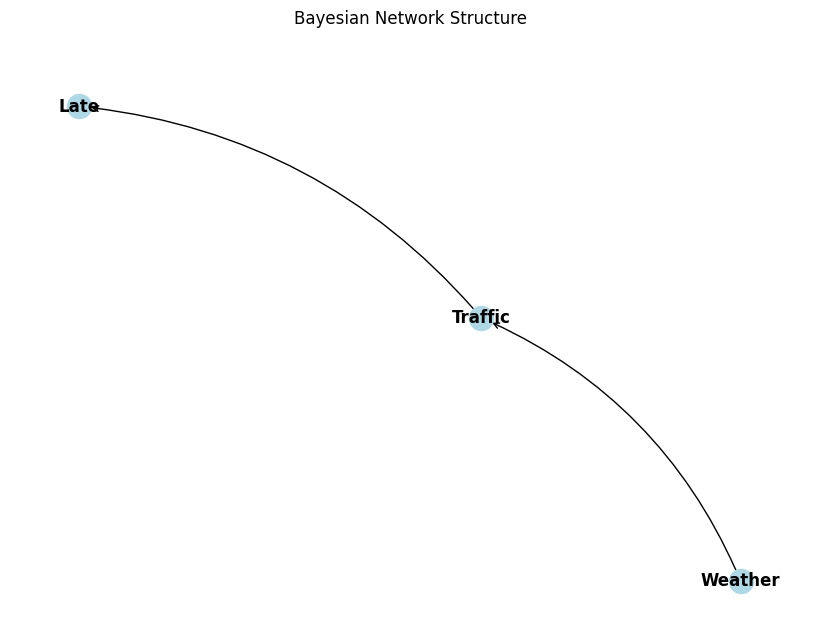

In [ ]:
#Visualize the Network Structure

import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianModel

nx_graph = nx.DiGraph()
nx_graph.add_edges_from(model.edges())

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True, node_color='lightblue',
        font_weight='bold', arrows=True, arrowstyle='->', connectionstyle='arc3,rad=0.2')

plt.title('Bayesian Network Structure')
plt.show()